<a href="https://colab.research.google.com/github/aoudjit/aoudjit/blob/main/ET5003_KaggleCompetition_Aziz_AOUDJIT_20201281_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "Team 3\"" #@param {type:"string"}
Student_ID&Name = "20201281_Aziz AOUDJIT" #@param {type:"string"}
Student_ID&Name = "20201281_Aziz AOUDJIT" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
!pip install gpy

     |████████████████████████████████| 959 kB 5.0 MB/s 
     |████████████████████████████████| 71 kB 9.4 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565110 sha256=00532578bf2f925fa1a5cc43432bd6ebd7cee7257eec2a8167459177fa666a5f
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=9841b6663d5faddbb54864226fc6e295b4b4e6b6e6b6afdf4b3385b8d1e696b5
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [ ]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [ ]:
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from nltk import sent_tokenize,word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC, LinearSVC, LinearSVR
import re
from nltk.stem import WordNetLemmatizer
import nltk
import math
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from nltk.corpus import wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# Common functions

## distance function to calculate the distance basis on the latitude, longitude between location of the property and the center of dublin

In [ ]:

def distance(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/1000

## function to calculate the similarity of words, it return an array of similar words

In [ ]:
def similarity(listWords):
    result={}
    feat1="Feat1"
    for word1 in listWords:
        for word2 in listWords:
            #print(word1)
            wordFromList1 = wordnet.synsets(word1)
            wordFromList2 = wordnet.synsets(word2)
            if wordFromList1 and wordFromList2: 
                s = wordFromList1[0].wup_similarity(wordFromList2[0])
                #print(s)
                if s != None:
                   if s>0.70 and s!=1.0:
                      if feat1 in result:
                         result[feat1] = result[feat1] + ' ' + word2
                      else:
                         result[feat1] = word2 
    return result

## function to calculate the similarity of word compared to list of words, it return all the words that are similar to the word given in parameter

In [ ]:
def similarity_word(word,listWords):
    result={}
    feat="Feat_"+word
    for word1 in listWords:
            wordFromList1 = wordnet.synsets(word)
            wordFromList2 = wordnet.synsets(word1)
            if wordFromList1 and wordFromList2: 
                s = wordFromList1[0].wup_similarity(wordFromList2[0])
                #print(s)
                if s != None:
                   if s>=0.70:
                      if feat in result:
                         result[feat] = result[feat] + ' ' + word1
                      else:
                         result[feat] = word1 
    return result

## function for distance encoding

In [ ]:
def distanceEncoder(distance):
    try:
        if distance<5 : 
            return "urban"
        if distance<10 :
            return "outurban"
        if distance<20 : 
            return "extraouturban"
        if distance>=20 :
            return "farest"
    except:
        return "farest"

## function for purging string from chars that are not in the set of the alphabet

In [ ]:
def purgeString(str):
  str = re.sub('[^a-zA-Z ]','',str)

  return str

## Class encapsulating all the function of NLP pipeline, it contains the global method build to apply tokenize,lemmatize, stemming of a given block text and return clean tokens.

In [ ]:
class NlpPipeline():
    
    def __init__(self, data, excluded_words):
        self.data = data 
        self.excluded_words= excluded_words
        self.corpus = {}
        
    def tokenize(self,raw):
        tokens = []
        for sent in sent_tokenize(raw):
            sent=sent.lower()
            sent=sent.replace('-','')
            sub_tokens=word_tokenize(sent)
            for w in sub_tokens:
                w= purgeString(w)

                tokens.append(''.join(w))
        #print(tokens)
        stopwords_en = set(stopwords.words('english'))
        #words = [word for word in tokens]

        words=[word for word in tokens if word not in stopwords_en ]
        words=[word for word in words if  len(word)>=4]
        words=[word for word in words if  len(word)<20]
        #print(words)
        
        stopwords_en_with_punct=stopwords_en.union(set(punctuation))
        words=[word for word in words if word not in stopwords_en_with_punct ]
        words=[word for word in words if word not in self.excluded_words ]
        
        return words
    
    def stem(self,tokens):
        stopwords_en = set(stopwords.words('english'))
        stemmer=PorterStemmer()
        stemmize_words=[]
        for word in tokens:
            stem = stemmer.stem(word)
            if stem not in stopwords_en and  stem not in self.excluded_words and len(stem)>=4:
                stemmize_words.append(stem)
        return stemmize_words
        
    def lemmatize(self,tokens):
        lemmatize_words=[]
        lemmatizer=WordNetLemmatizer()
        for word in tokens:
            if word not in self.excluded_words:
                lemmatize_words.append(lemmatizer.lemmatize(word))
        return lemmatize_words
    
    def PosTag(self,tokens):
        tagged_words=nltk.pos_tag(tokens)
        return tagged_words

        
    def ner(self,tagged_words):
        chunk_words=nltk.ne_chunk(tagged_words, binary=True)
        entity_names=[]
        for tree in chunk_words.subtrees():
            #print(tree)
            entity_names.extend(self.extract_entity(tree))
        #print(entity_names)
        return entity_names
    
    def extract_entity(self,t):
        entity_names=[]
        if hasattr(t,'label') and t.label():
            if t.label()=='S':
            
               for child in t:
                   # if child[1]=='JJS' or child[1]=='JJR' or child[1]=='JJ' or child[1]=='NN':
                        entity_names.append(''.join(child[0]))
                   # else:
                      #  for child in t:
                          #  entity_names.extend(self.extract_entity(child))
            else:
                for child in t:
                    entity_names.extend(extract_entity(child))
        return entity_names
    
    def build(self):
        models = []
        full_tokens=[]
        data=self.data.values.reshape(-1,1)
        #print(self.data.shape)
        for i in range(data.shape[0]):
            sent=data[i]
            tokens=self.tokenize(sent[0])
            
            tokens=self.stem(tokens)
            
            tokens=self.lemmatize(tokens)
           # tokens= ' '.join(dict.fromkeys(str(tokens).split()))

            #tagged_words=self.PosTag(tokens)
            #print(tagged_words)
            #entities = self.ner(tagged_words)
            model = ''
            for token in tokens:
                model = model + ' ' + token
                if  token in self.corpus:
                   self.corpus[token] = self.corpus[token] + 1
                else: 
                   self.corpus[token] = 1
            
            models.append(model)

            
        return models

## function to plot outliers

In [ ]:
def outliners(feature):
    fig = plt.figure(figsize=(10,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title("Boxplot of " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Applicants')
    dftrain.boxplot(column=[feature])

    plt.show()

## function to calculate the PPC

In [ ]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

## function to plot the predicted values and true observations

In [ ]:
def plot(Ypred,ylog):

# plot prediction shape
  for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
  az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
  az.plot_dist(ylog,label='true observations');
  plt.legend()
  plt.xlabel("log(y) - output variable")
  plt.ylabel("density plot");

## function for clustering a dataset

In [ ]:
def clusters(Xf_train,Xf_test,yf_train,cluster_number):
  Xn = Xf_train[clusters_train==cluster_number,:]
  Xtestn = Xf_test[clusters_test==cluster_number,:]

  ylog = np.log(yf_train.astype('float')[clusters_train==cluster_number,:])
  yscaller = StandardScaler().fit(ylog)
  yn = yscaller.transform(ylog) 
  return Xn,yn,yscaller,ylog,Xtestn  

## function to calculate posterior and predictions on a given dataset

In [ ]:
def predict_posterior(Xn,yn,yscaller,nsamples):

  with pm.Model() as model:
  # prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn.shape[1])
  # prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn.T)
  # likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn[:,0])
    approximation = pm.fit(60000,method='advi')

# samples from the posterior  
    posterior = approximation.sample(2500,include_transformed=True)
    Ypred = yscaller.inverse_transform(ppc(posterior['alpha'],posterior['beta'],posterior['sigma_n'],Xn,  nsamples=nsamples))
    return Ypred,posterior

## function to claculate BLR and print the MAE, MAPE metrics

In [ ]:
def print_performance(X_test,y_test,scaller,posterior,num_cluster): 
   y_pred_BLR = np.exp(scaller.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), X_test.T)))
   print("Size Cluster",num_cluster,":", np.sum(clusters_test==num_cluster), ", MAE Cluster",num_cluster,":",
      (np.mean(abs(y_pred_BLR - y_test[clusters_test==num_cluster]))))
   print("MAPE Cluster",num_cluster,":",(np.mean(abs(y_pred_BLR - y_test[clusters_test==num_cluster]) /y_test[clusters_test==num_cluster])))
   #print(y_pred_BLR.shape,":",np.array(y_test[clusters_test==num_cluster]).shape)
   return y_pred_BLR

## function to calculate MSE between true values and predicted values

In [ ]:
def calculate_mean_square_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.mean(np.square((actual - pred) / actual))) * 100

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

### Train dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/university/modules/ET5003/house-price/'
# training dataset: 
training_file = 'HousePrice_Train.csv'
dftrain=pd.read_csv(path+training_file)
# test dataset: 
testing_file = 'HousePrice_Test.csv'
dftest=pd.read_csv(path+testing_file)

#### check nan values

In [ ]:
dftrain.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [ ]:
dftrain.drop(['Services'], axis=1,inplace=True)

#### check correlation:
check the positive/negative correlation between the numerical features

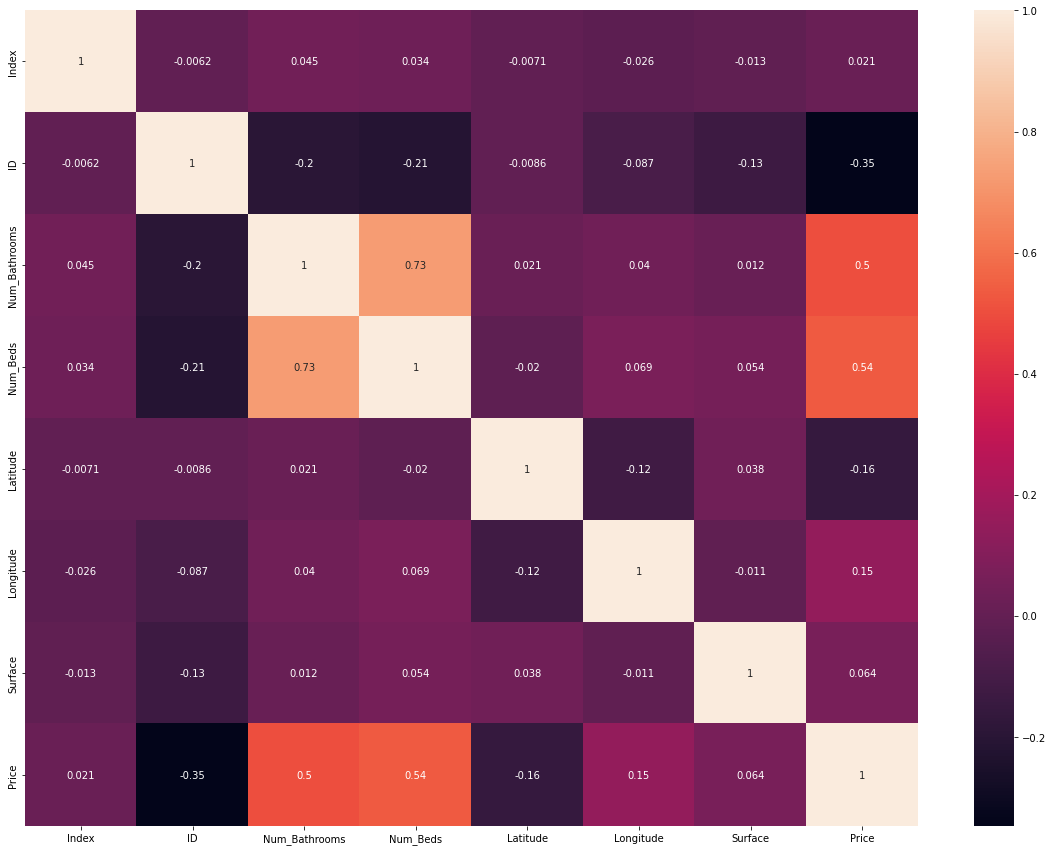

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 15] 
sns.heatmap(dftrain.corr(), annot=True)

from the above heatmap, we don't have high negative correlation between the main features (long,lat,num_beds,_num_bathrooms) and price

#### encode categorical features to numerical values:
this is needed to extract the feature importance
encode the BER_class, simple encoding with sequential numbers from 1 to 17, based on the unique values of the feature BER_class using dftrain.BER_class.unique()

In [ ]:
dftrain['BER_class_enc'] = dftrain.BER_class
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'A1':0,'A2':1,'A3':2})
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'B1':3,'B2':4,'B3':5})
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'C1':6,'C2':7,'C3':8})
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'D1':9,'D2':10,'D3':11})
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'E1':12,'E2':13,'E3':14})
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({'F':15,'G':16,'SINo666of2006exempt':17})

In [ ]:
dftrain.BER_class_enc.describe()

count    1387.000000
mean        9.348234
std         3.713281
min         0.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        17.000000
Name: BER_class_enc, dtype: float64

the mean value of the feature BER_class_enc(the BER_class encoded) is 9 so will replace the nan values with 9

In [ ]:
dftrain.BER_class.describe()

count     1387
unique      16
top         D1
freq       182
Name: BER_class, dtype: object

In [ ]:
dftrain['BER_class_enc'] = dftrain.BER_class_enc.replace({np.nan:9})

#### Features importance:
will split the dftrain to 30% test dataset and 70% training dataset and apply GradientBoostingRegressor to extract the important features of the full dataset

In [ ]:

features_=['Num_Bathrooms', 'Num_Beds' ,'BER_class_enc',
'Latitude' ,
'Longitude' ,  
'Surface', 'Price'  ]
dftrain_ = dftrain[features_].dropna(axis=0)
X = dftrain_.loc[:, dftrain_.columns != 'Price']
y = dftrain_['Price']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.30)

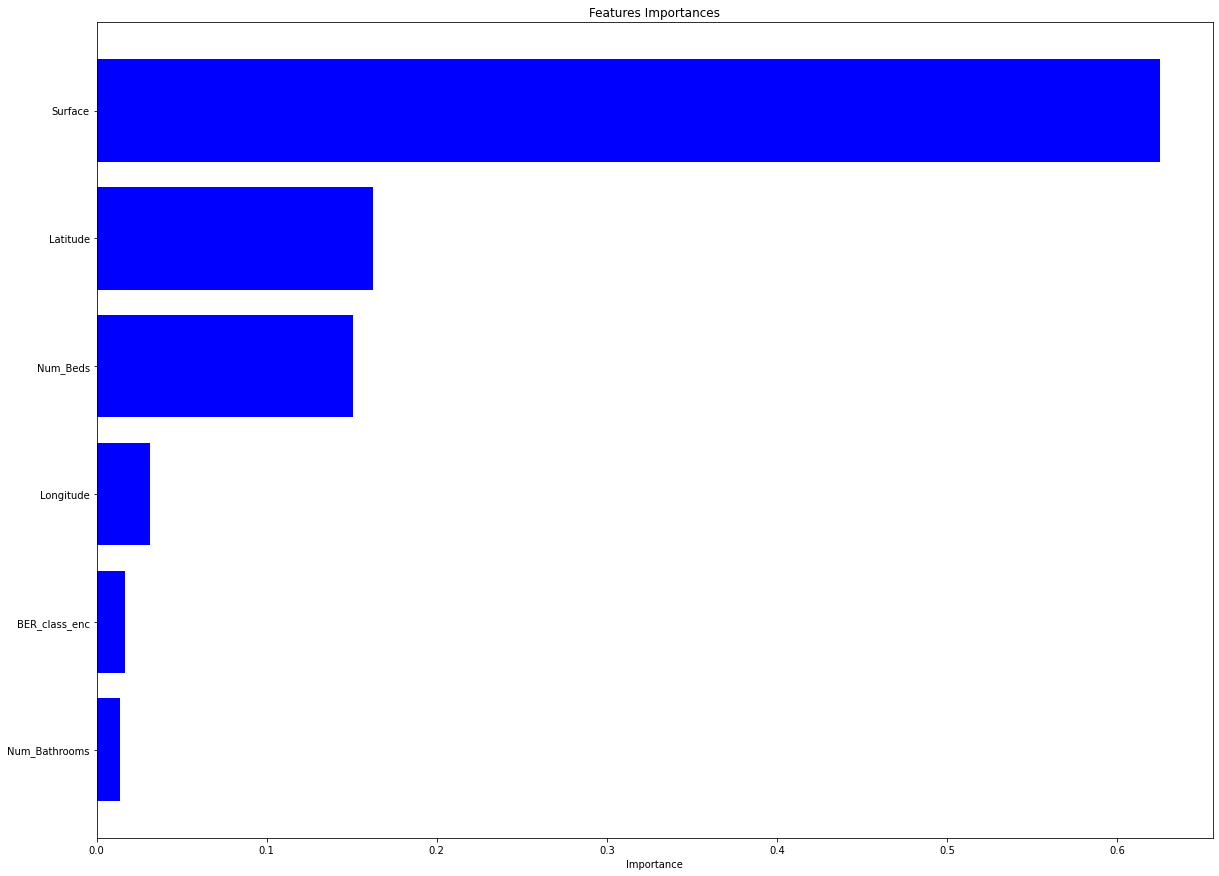

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=1, max_depth=10)
model.fit(X_train_fs, y_train_fs)

indices = np.argsort(model.feature_importances_)
plt.title('Features Importances')
plt.barh(range(len(indices)), model.feature_importances_[indices], color='b')
plt.yticks(range(len(indices)), [dftrain_.columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()

we can see in this plot that the surface is the most important feature, but also all the other features has significant importance so will keep for the moment all the features
#### check the correlation between all the features selected above

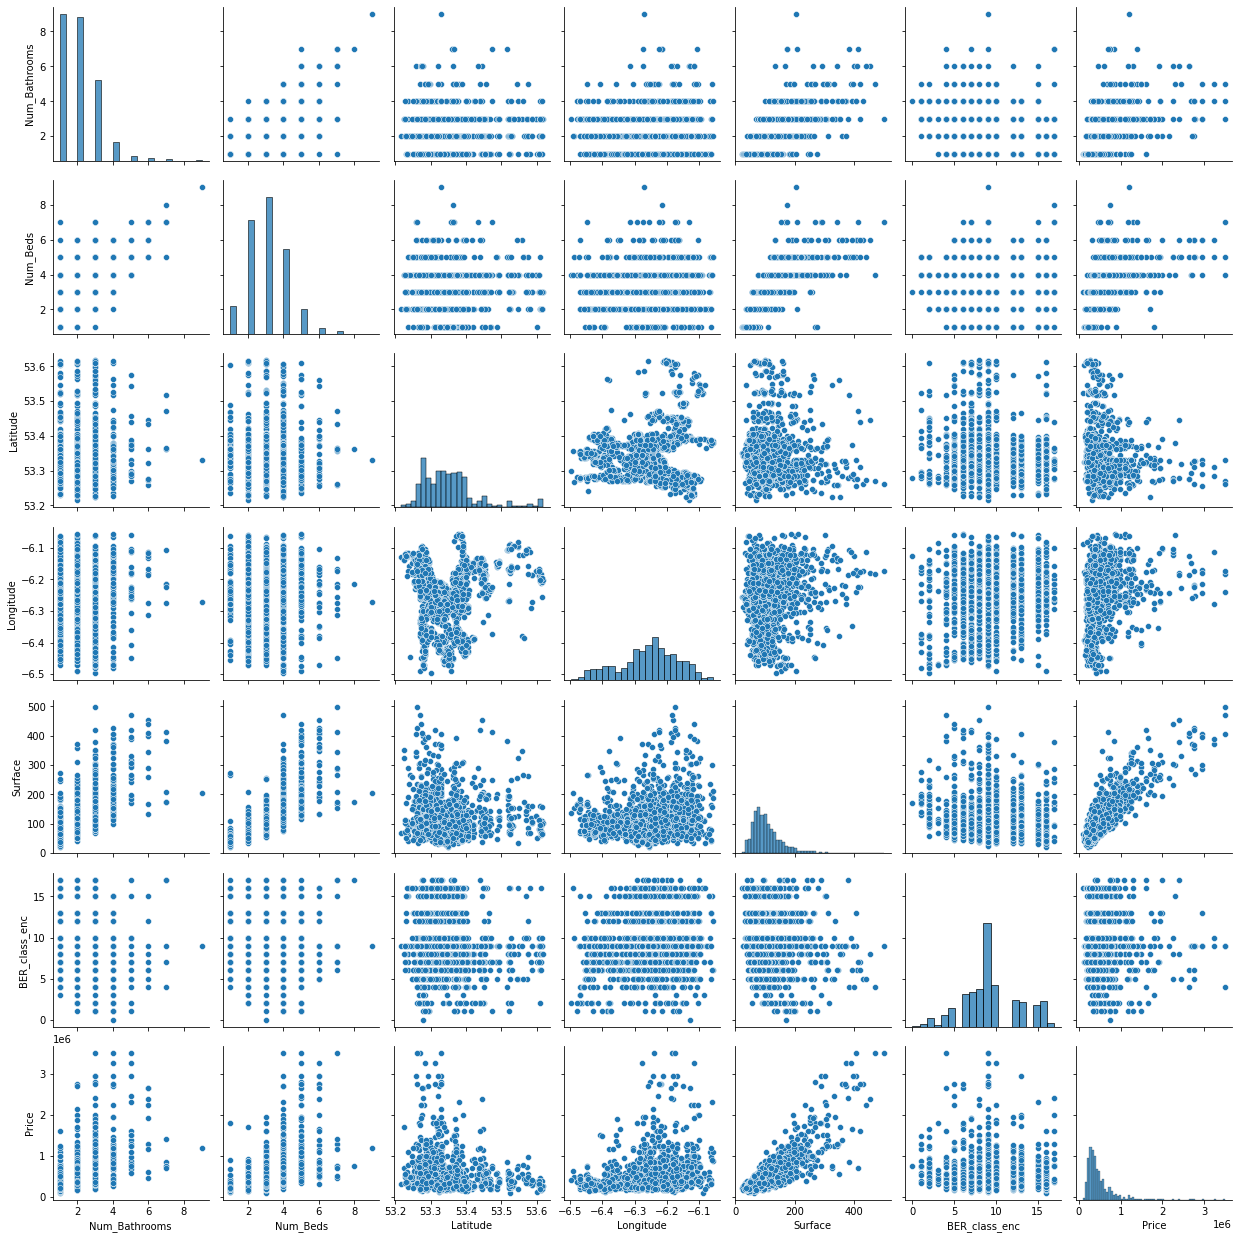

In [ ]:
# Pairplot to show correlation between features
sns.pairplot(data=dftrain[['Num_Bathrooms','Num_Beds','Latitude', 'Longitude', 'Surface','BER_class_enc', 'Price']].dropna())
plt.show()

#### Check outliers

In [ ]:
dftrain.Surface.describe()

count     1638.000000
mean       169.540695
std       1791.793934
min          3.400000
25%         73.000000
50%         97.050000
75%        135.000000
max      72236.387140
Name: Surface, dtype: float64

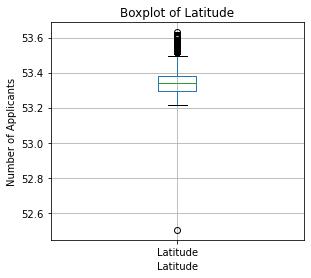

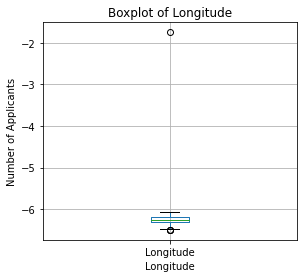

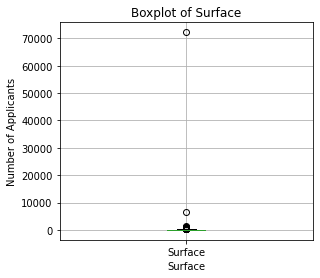

In [ ]:
outliners('Latitude')
outliners('Longitude')
outliners('Surface')

#### remove outliers

In [ ]:

dftrain.drop(dftrain[dftrain["Surface"] < 20].index,  inplace=True)

In [ ]:

dftrain.drop(dftrain[dftrain["Surface"] >500].index,  inplace=True)

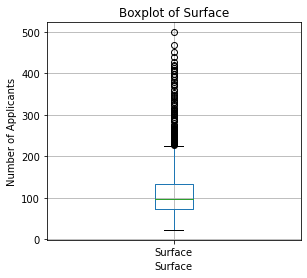

In [ ]:
outliners('Surface')

In [ ]:
dftrain=dftrain[dftrain.Num_Bathrooms!=0]
dftrain=dftrain[dftrain.Num_Beds!=0]
dftrain=dftrain[dftrain.Num_Bathrooms<=10]
dftrain=dftrain[dftrain.Num_Beds<=10]
dftrain=dftrain[dftrain.Longitude<=-6]
dftrain=dftrain[dftrain.Latitude>53]

#### check distribution values of the features

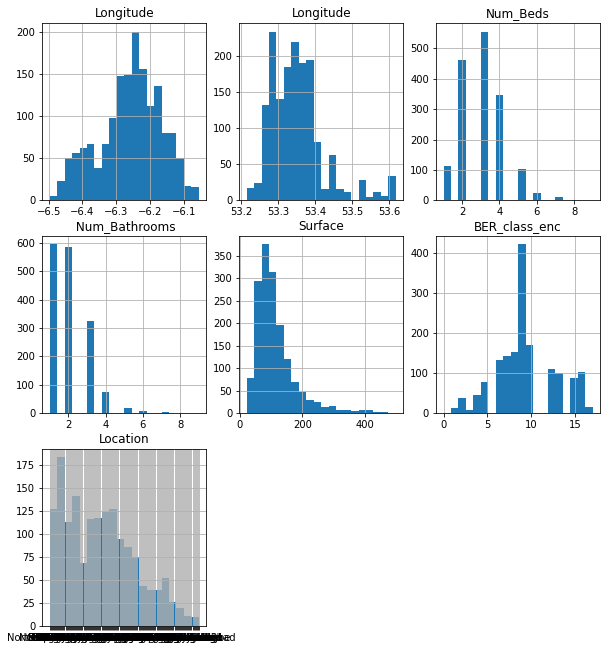

In [ ]:
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(4,3,1)
ax1.set_title("Longitude")
dftrain['Longitude'].hist(bins=20)
ax2 = fig.add_subplot(4,3,2)
ax2.set_title("Longitude")
dftrain['Latitude'].hist(bins=20)
ax3 = fig.add_subplot(4,3,3)
ax3.set_title("Num_Beds")
dftrain['Num_Beds'].hist(bins=20)
ax4 = fig.add_subplot(4,3,4)
ax4.set_title(" Num_Bathrooms")
dftrain['Num_Bathrooms'].hist(bins=20)
ax5 = fig.add_subplot(4,3,5)
ax5.set_title("Surface")
dftrain['Surface'].hist(bins=20)
ax6 = fig.add_subplot(4,3,6)
ax6.set_title("BER_class_enc")
dftrain['BER_class_enc'].hist(bins=20)
ax7 = fig.add_subplot(4,3,7)
ax7.set_title("Location")
dftrain['Location'].hist(bins=20)

the above features will be encoded  to have a good and uniform distribution 

In [ ]:
#replace location values feature with numbers starting from 1 to len(unique values of location)
unique = np.unique(dftrain['Location'])
indexes = [i+1 for i in range(len(unique))]
unique_index_dict = dict(zip(unique, indexes))
dftrain = dftrain.replace({'Location': unique_index_dict})

In [ ]:
mmx = MinMaxScaler()
xsc = StandardScaler()
dftrain[['Location']] = mmx.fit_transform(dftrain[['Location']])
dftrain[['BER_class_enc', 'Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms']] = xsc.fit_transform(dftrain[['BER_class_enc', 'Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms']])

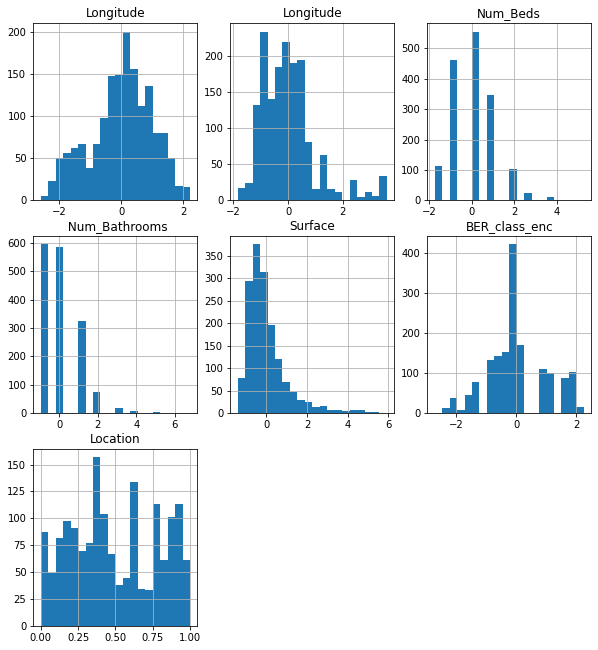

In [ ]:
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(4,3,1)
ax1.set_title("Longitude")
dftrain['Longitude'].hist(bins=20)
ax2 = fig.add_subplot(4,3,2)
ax2.set_title("Longitude")
dftrain['Latitude'].hist(bins=20)
ax3 = fig.add_subplot(4,3,3)
ax3.set_title("Num_Beds")
dftrain['Num_Beds'].hist(bins=20)
ax4 = fig.add_subplot(4,3,4)
ax4.set_title(" Num_Bathrooms")
dftrain['Num_Bathrooms'].hist(bins=20)
ax5 = fig.add_subplot(4,3,5)
ax5.set_title("Surface")
dftrain['Surface'].hist(bins=20)
ax6 = fig.add_subplot(4,3,6)
ax6.set_title("BER_class_enc")
dftrain['BER_class_enc'].hist(bins=20)
ax7 = fig.add_subplot(4,3,7)
ax7.set_title("Location")
dftrain['Location'].hist(bins=20)

In [ ]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Price','Surface','BER_class_enc','Location']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)


# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
#Xs_train = X_train
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   
#ys_train = y_train




In [ ]:
print(X_train.shape)

(1143, 6)


### Test dataset

In [ ]:

X_test = dftest

# NATURAL LANGUAGE PROCESSING

In [ ]:
import nltk
#nltk.download('all')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 


the dftrain dataset contains a good feature that we can include in prediction, but this feature is text block that we need to process, encoding big block of text is not possible and leads to a very big and complex logique, NLP is the best tool to analyse this type of feature
will use the Tokenize, Lemmatize and Stemmize of the NLP pipeline.
once the full corpus is defines will vectorize the corpus and will use MiniBatchKmeans to extract some usefull clusters of the vectorized corpus, will use PCA for feature reduction to avoid thousand of features in our model.

In [ ]:
#coordinates = [dftrain.Latitude,dftrain.Longitude]
#coordinates = pd.DataFrame(np.array(coordinates).T).add_prefix('C')
#distances=np.ones(dftrain.Latitude.shape)
#dublin_coordinate =[53.3498053,-6.2603097]
#for i in range(coordinates.C0.shape[0]) :
  #  coord=[coordinates.C0[i], coordinates.C1[i]]
  #  d = distance(dublin_coordinate, np.array(coord))
  #  distances[i]=d

#dftrain["Distances"] = pd.DataFrame(np.array(distances))    
#dftrain["Distance"] = dftrain["Distances"].apply(distanceEncoder)


remove duplicate words from each row in decsription

In [ ]:
for i in range(dftrain.Description.values.shape[0]):
    dftrain.Description.values[i]=' '.join(dict.fromkeys(dftrain.Description.values[i].split()))
    #print (dftrain.Description.values[i])
#dftrain.Description.values = dftrain.Description.values' '.join(dict.fromkeys(string.split())))

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split
y=dftrain.Price
X=dftrain

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.3)


ylog = np.log(np.array(y_train.astype('float')).reshape(-1,1))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)
ylog_val = np.log(np.array(y_val.astype('float')).reshape(-1,1))
yscaler_val = StandardScaler().fit(ylog_val)
yn_val = yscaler_val.transform(ylog_val)


build the corpus by calling the class NlpPipeline.build defined in the common sections above, will use an array of excluded words that are useless informations like living, room,kitchen, we assume that no house is built without living room or kitchen

In [ ]:
excluded_words=['living','bedroom','kitchen','room','bathroom',' entrance','hall','delight','offer','purchase','include','sale','agent','minute','owner','highlighted','four','approx','proport','point','back','rear']
nlp = NlpPipeline (X_train.Description,excluded_words)
data = nlp.build()
data_df = pd.DataFrame(np.array(data)).add_prefix('C')



print the corpus and word frequency in the feature description

In [ ]:
sorted_corpus = sorted(nlp.corpus.items(), key=lambda x:x[1],reverse=True)
sortdict = dict(sorted_corpus)
print(sortdict)
#print (data)

### vectorize the cleaned field description and apply MiniBatchKMeans on it to train it, and apply  PCA for feature reduction
reference for dimension reduction (Lourraine, L. 2019)

(1129, 6129) (1129,) (1129, 3) (1129, 14)


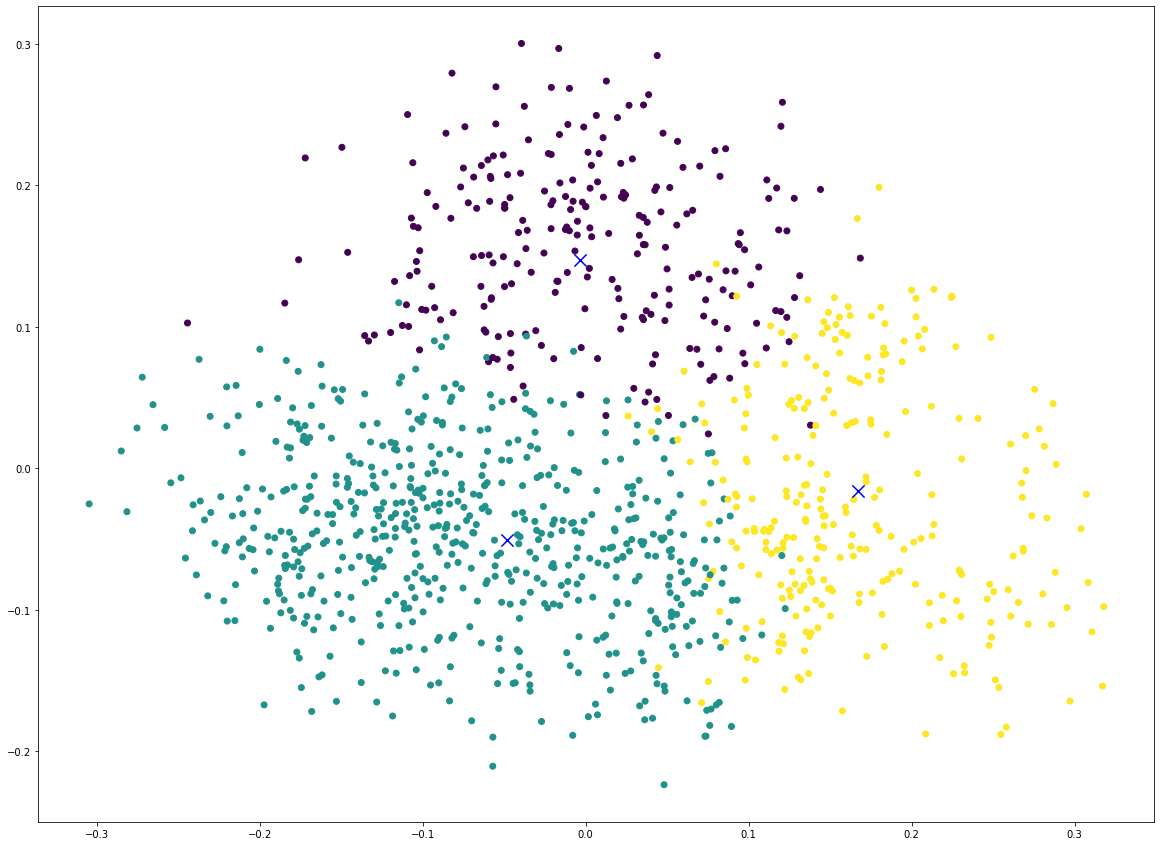

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(data_df.C0)
features = vectorizer.transform(data_df.C0)
cls = MiniBatchKMeans(n_clusters=3, random_state=0)
cls.fit(features)
cls.predict(features)


# reduce features to 2
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# visulaisation of center clusters
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
print(features.shape,data_df.C0.shape,reduced_features.shape, X_train.shape )

after trying multiple clustering minibatch with 3 clusters the data looks good well separated, so will use only 3 features from all the features vectorized.

In [ ]:
feat=pd.DataFrame(features.toarray(), columns=sorted(vectorizer.vocabulary_.keys()))
print(feat)

      abathshow  abbey  abbeyfield  abil  ...  zion  zonal  zone  zozimu
0           0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
1           0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
2           0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
3           0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
4           0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
...         ...    ...         ...   ...  ...   ...    ...   ...     ...
1124        0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
1125        0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
1126        0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
1127        0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0
1128        0.0    0.0         0.0   0.0  ...   0.0    0.0   0.0     0.0

[1129 rows x 6141 columns]


## Features creation
select only 3 useful features returned by the PCA and concatenate it the existing features, apply the AdaBoostRegressor to train the model and validate it
the following features are used to train the model and evaluate it
'Latitude','Longitude','Num_Bathrooms','Num_Beds','Surface','BER_class_enc','Location','Feat1','Feat2','Feat3'

In [ ]:
#print(corpus)
#print(list(corpus.keys()))
##print(similarity_word("education",list(corpus.keys())))
#print(similarity_word("sport",list(corpus.keys())))
#print(similarity_word("shops",list(corpus.keys())))
#print(similarity_word("entertainment",list(corpus.keys())))
#print(similarity_word("transportation",list(corpus.keys())))

In [ ]:
X_train['Feat1'] = reduced_features.T[0]
X_train['Feat2'] = reduced_features.T[1]
X_train['Feat3'] = reduced_features.T[2]
#X_train['Feat4'] = reduced_features.T[3]

In [ ]:
xtrain_feat = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Surface','BER_class_enc','Location','Feat1','Feat2','Feat3']
# dropna: remove missing values
newX_train = X_train[xtrain_feat].dropna(axis=0)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html?highlight=treeregressor#sklearn.tree.ExtraTreeRegressor

In [ ]:
print(reduced_features.shape,newX_train.shape)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
reg = AdaBoostRegressor(extra_tree,n_estimators=800, random_state=0, learning_rate=0.1).fit(newX_train, y_train)
pred_b = reg.predict(newX_train)
print ("R2 Score = ",r2_score(y_train, pred_b))
print("MAE = ",(np.mean(abs(pred_b - y_train))))
print("MAPE = ",(np.mean(abs(pred_b - y_train) / y_train)))

(1129, 3) (1129, 10)
R2 Score =  0.9999601364574353
MAE =  498.2728077945084
MAPE =  0.0023848181112427354


the result on the trainig data is perfect with 99,99% of success predictions


In [ ]:
nlp2 = NlpPipeline (X_val.Description,excluded_words)
data2 = nlp2.build()
data_df2 = pd.DataFrame(np.array(data2)).add_prefix('C')
features_val = vectorizer.transform(data_df2.C0)
reduced_features_val = pca.transform(features_val.toarray())
print(reduced_features_val.shape)

(484, 3)


In [ ]:
X_val['Feat1'] = reduced_features_val.T[0]
X_val['Feat2'] = reduced_features_val.T[1]
X_val['Feat3'] = reduced_features_val.T[2]
#X_val['Feat4'] = reduced_features_val.T[3]
xval_feat = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Surface','BER_class_enc','Location','Feat1','Feat2','Feat3']
# dropna: remove missing values
newX_val = X_val[xval_feat].dropna(axis=0)
pred_test = reg.predict(newX_val)
print ("R2 Score =",r2_score(y_val, pred_test))
print("MAE = ",(np.mean(abs(pred_test - y_val))))
print("MAPE = ",(np.mean(abs(pred_test - y_val) / y_val)))

R2 Score = 0.7804937554363701
MAE =  92918.90495867768
MAPE =  0.16786526756812134


the result on validation dataset is optimistic with a rate MAPE of 16% error, will apply other approchs to reduce this rate, the next section will use Piecewise Regression

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

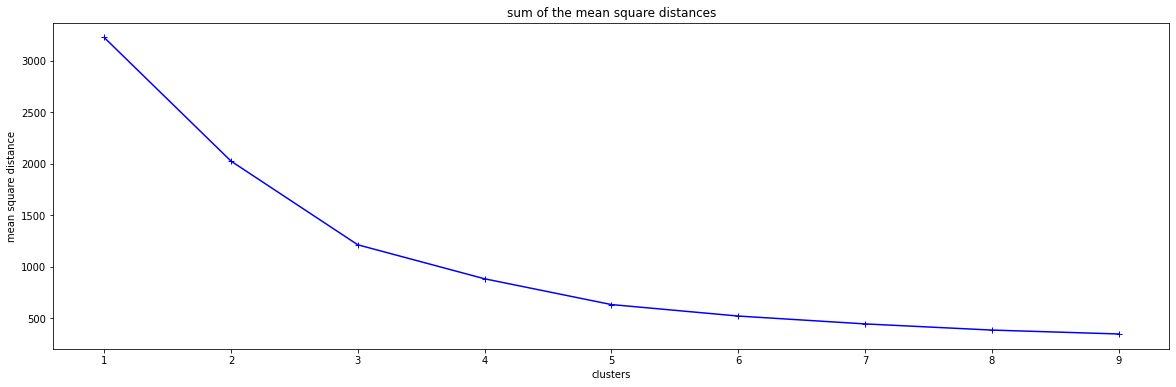

In [ ]:
from sklearn.cluster import KMeans
ind=[0,1]
X_ind = np.vstack([np.array(newX_train)[:,ind],np.array(newX_val)[:,ind]])
inertia = []
indexes = []
for cls in range(1, 10):
    kmeans = KMeans(init='random', n_clusters=cls, max_iter=500).fit(np.array(X_ind))
    inertia.append( kmeans.inertia_)
    indexes.append( cls)


plt.figure(figsize=(20, 6))
plt.plot(indexes, inertia, 'b+-')
plt.xlabel("clusters")
plt.ylabel("mean square distance")

plt.title("sum of the mean square distances")
plt.show()

from the elbow plot above, we can say that the value 4 is the optimal values for clusters


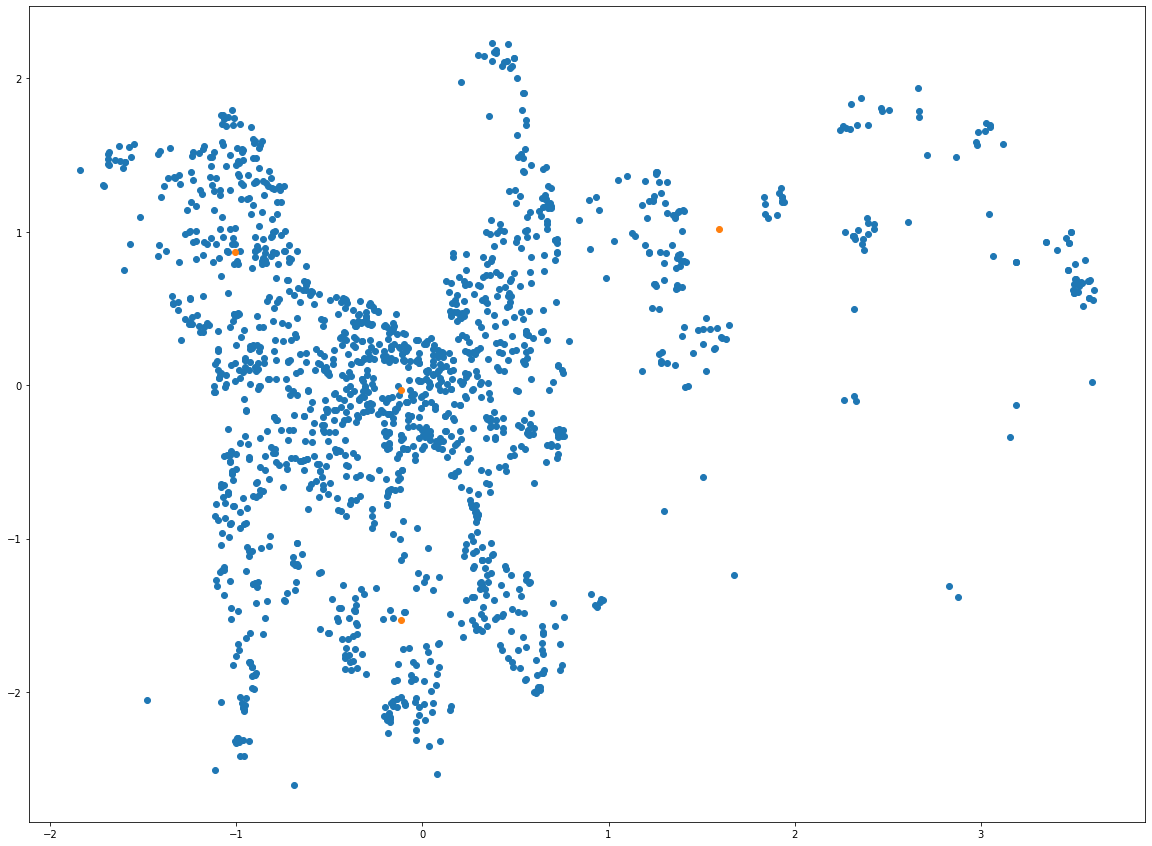

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
dftrain.head()
gmm = GaussianMixture(n_components=4)

# Gaussian Mixture

gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

the plot above show a good repartition of the data with 4 clusters

will cluster the training dataset and validation dataset, and claculate the posterior for each cluster

In [ ]:
# train clusters
clusters_train = gmm.predict(np.array(newX_train)[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 218, 1: 189, 2: 546, 3: 176}

In [ ]:
# test clusters
clusters_test = gmm.predict(np.array(newX_val)[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))


{0: 90, 1: 101, 2: 220, 3: 73}

In [ ]:
ylog_train = np.log(np.array(y_train).astype('float').reshape(-1,1))
yscaler_train = StandardScaler().fit(ylog_train)
y_train_scalled = yscaler_train.transform(ylog_train)
ylog_test = np.log(np.array(y_val).astype('float').reshape(-1,1))
yscaler_test = StandardScaler().fit(ylog_test)
y_val_scalled = yscaler_test.transform(ylog_test)




In [ ]:

Xn0,yn0,yscaller0,ylog0,Xtestn0=clusters(np.array(newX_train),np.array(newX_val),np.array(y_train).reshape(-1,1),0)
Ypred0,posterior0=predict_posterior(Xn0,yn0,yscaller0,500)
Xn1,yn1,yscaller1,ylog1,Xtestn1=clusters(np.array(newX_train),np.array(newX_val),np.array(y_train).reshape(-1,1),1)
Ypred1,posterior1=predict_posterior(Xn1,yn1,yscaller1,500)
Xn2,yn2,yscaller2,ylog2,Xtestn2=clusters(np.array(newX_train),np.array(newX_val),np.array(y_train).reshape(-1,1),2)
Ypred2,posterior2=predict_posterior(Xn2,yn2,yscaller2,500)
Xn3,yn3,yscaller3,ylog3,Xtestn3=clusters(np.array(newX_train),np.array(newX_val),np.array(y_train).reshape(-1,1),3)
Ypred3,posterior3=predict_posterior(Xn3,yn3,yscaller3,500)
#Xn4,yn4,yscaller4,ylog4,Xtestn4=clusters(X_train,X_val,y_train,4)
#Ypred4,posterior4=predict_posterior(Xn4,yn4,yscaller4,200)

Finished [100%]: Average Loss = 186.49


Finished [100%]: Average Loss = 124.07


Finished [100%]: Average Loss = 347.93


Finished [100%]: Average Loss = 187.56


plot the graph predictions/true observation for each cluster

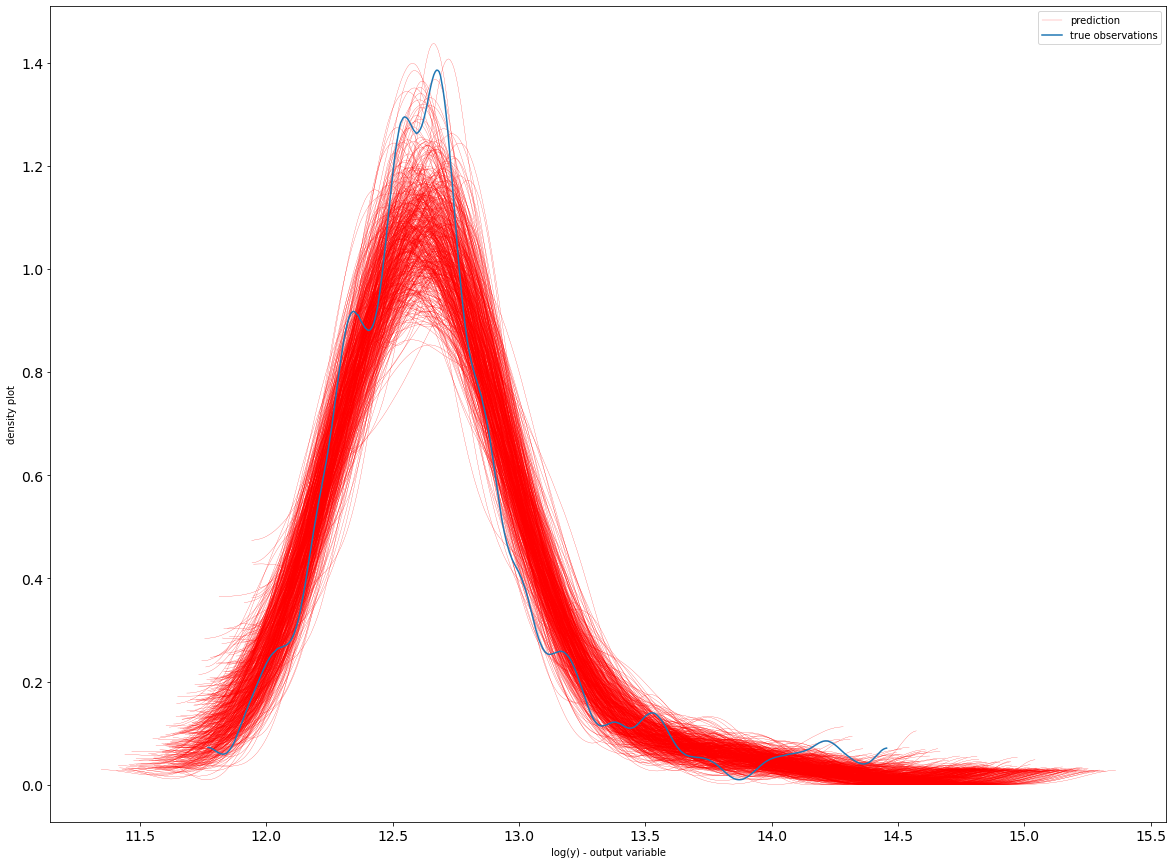

In [ ]:
plot(Ypred0,ylog0)

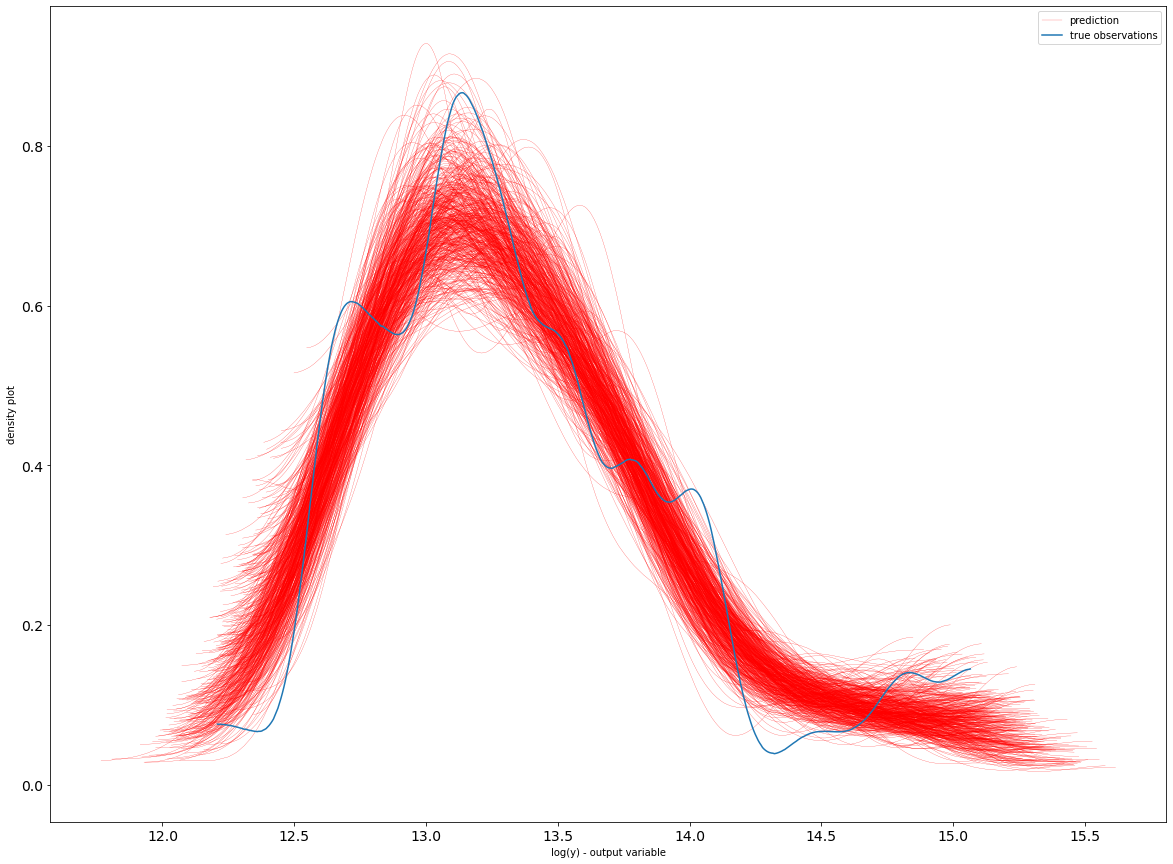

In [ ]:
plot(Ypred1,ylog1)

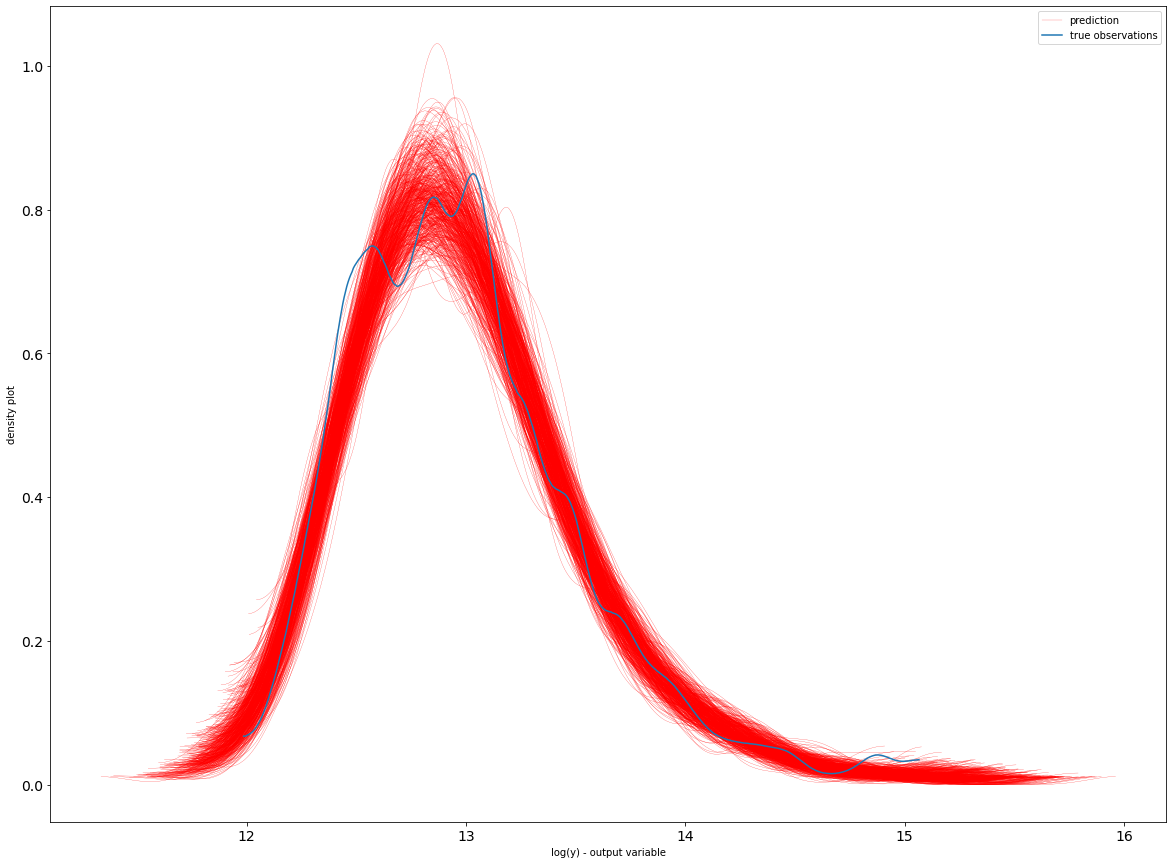

In [ ]:
plot(Ypred2,ylog2)

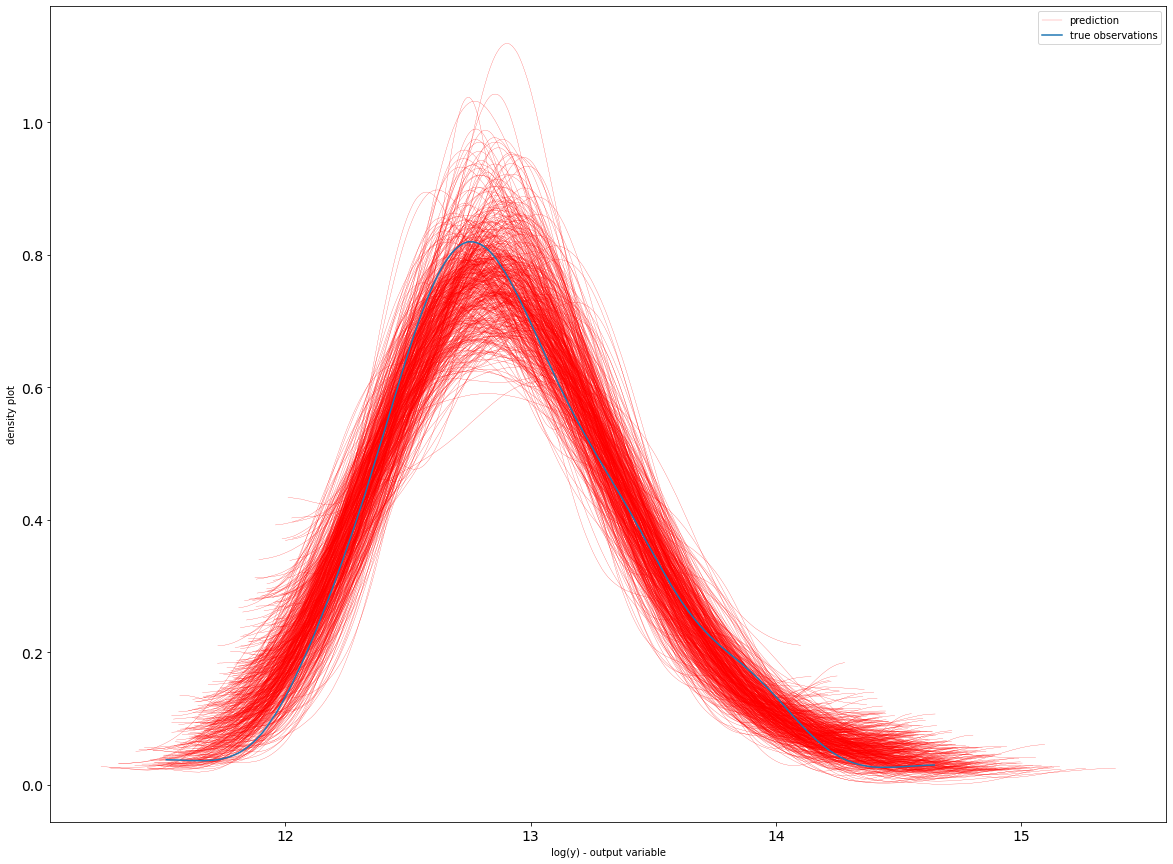

In [ ]:
plot(Ypred3,ylog3)

the plot shows a good fitting curves of prediction and true values on training data set
let's plot the curves of predictions/true observation for merged clusters

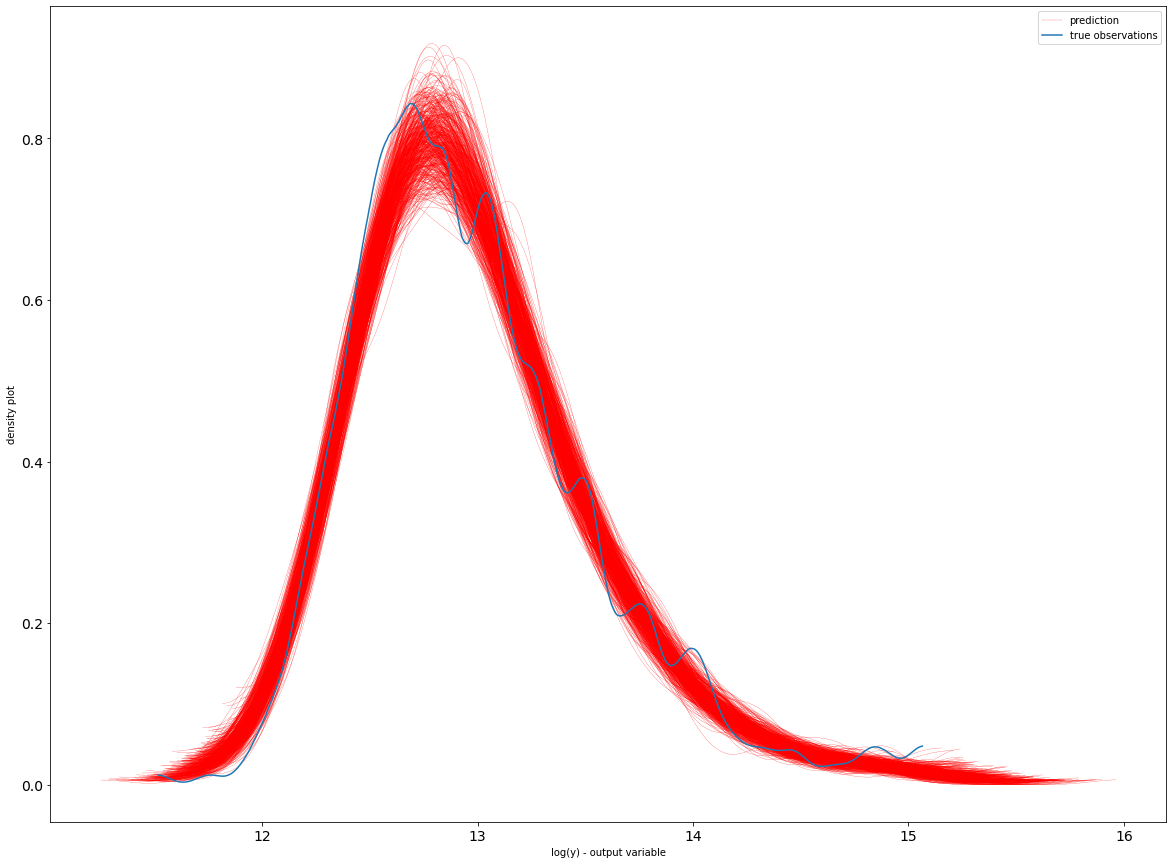

In [ ]:
# simulation
Ypred = np.hstack([ Ypred0,Ypred1,Ypred2,Ypred3])
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])

plot(Ypred,ylog)

### calculate performance on the validation data set

In [ ]:
y_pred_BLR0=print_performance(Xtestn0,y_val,yscaller0,posterior0,0)
y_pred_BLR1=print_performance(Xtestn1,y_val,yscaller1,posterior1,1)
y_pred_BLR2=print_performance(Xtestn2,y_val,yscaller2,posterior2,2)
y_pred_BLR3=print_performance(Xtestn3,y_val,yscaller3,posterior3,3)
#y_pred_BLR4=print_performance(Xtestn4,y_val,yscaller4,posterior4,4)
#print(y_pred_BLR0,":",np.array(y_val[clusters_test==0]).reshape(-1))
# joint
joint=np.hstack([abs(y_pred_BLR0 - y_val[clusters_test==0]),
                 abs(y_pred_BLR1 - y_val[clusters_test==1]),
                 abs(y_pred_BLR2 - y_val[clusters_test==2]),
                 abs(y_pred_BLR3 - y_val[clusters_test==3])])
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_val[clusters_test==0]) /y_val[clusters_test==0],
                        abs(y_pred_BLR1 - y_val[clusters_test==1]) /y_val[clusters_test==1],
                        abs(y_pred_BLR2 - y_val[clusters_test==2]) /y_val[clusters_test==2],
                        abs(y_pred_BLR3 - y_val[clusters_test==3]) /y_val[clusters_test==3]
                        
                       ]))

# MAE band MAPE
print("Overall MAE=",np.mean(joint),"Overall MAPE=",joint_mape)

Size Cluster 0 : 90 , MAE Cluster 0 : 59085.89847411482
MAPE Cluster 0 : 0.15563890386851995
Size Cluster 1 : 101 , MAE Cluster 1 : 131159.33882158392
MAPE Cluster 1 : 0.17879390660186778
Size Cluster 2 : 220 , MAE Cluster 2 : 97448.66984910643
MAPE Cluster 2 : 0.1826210524265219
Size Cluster 3 : 73 , MAE Cluster 3 : 131354.97954542667
MAPE Cluster 3 : 0.2201957659492411
Overall MAE= 102463.72925055756 Overall MAPE= 0.1824723313286877


the overall MAPE on the validation data is higher than the MAPE retrieved by AdaBoosterRegressor in the previous section. will try Bayesian NN in the next section if it can perform better.

PPC on the validation set

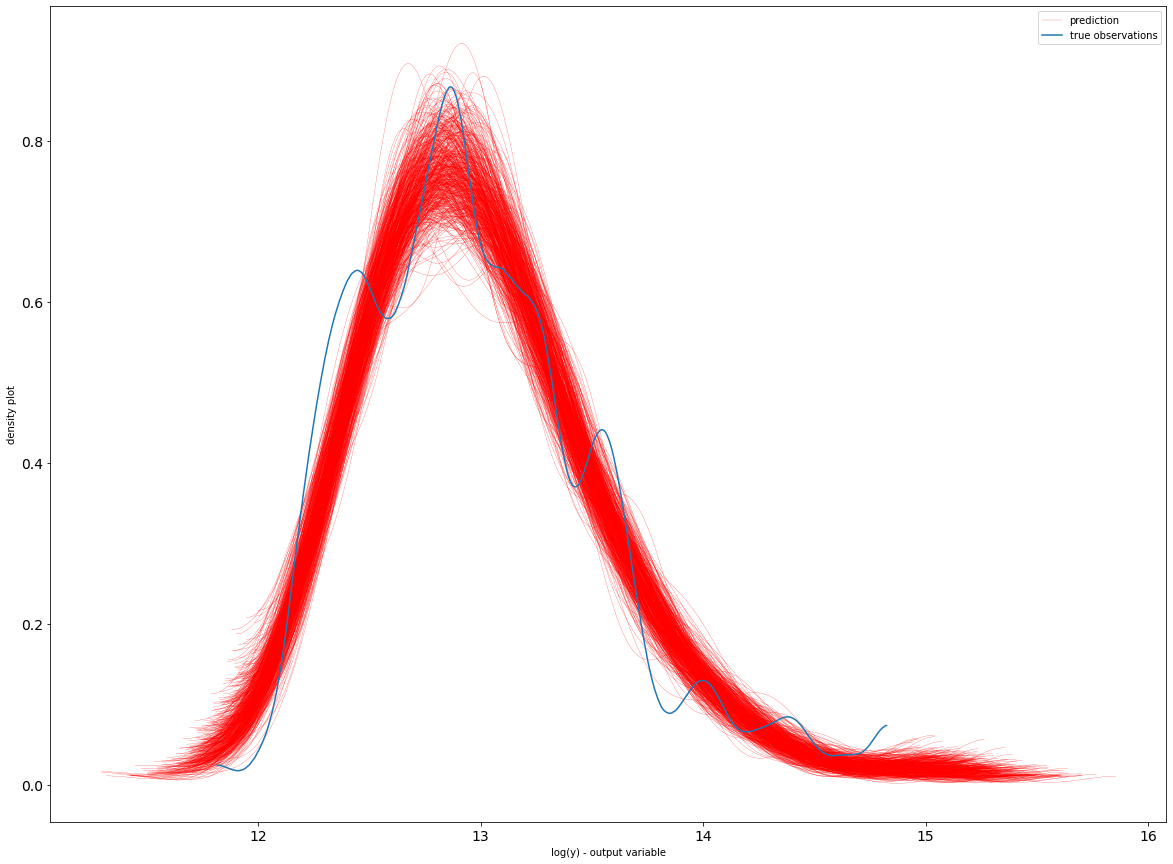

In [ ]:
num_samples2 = 500
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)


# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaller0.inverse_transform(Ypred0),
                 yscaller1.inverse_transform(Ypred1),
                 yscaller2.inverse_transform(Ypred2),
                 yscaller3.inverse_transform(Ypred3),
                 ])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
# true observations
az.plot_dist(np.log(y_val),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

PyMC3 is anew open source Probabilistic Programming framework written in Python that uses Theanoto compute gradients via automatic differentiation as well as compile probabilisticprograms on-the-fly to C for increased speed. Contrary to other Probabilistic Programminglanguages, PyMC3 allows model specification directly in Python code. The lack of a domainspecific language allows for great flexibility and direct interaction with the model. Thispaper is a tutorial-style introduction to this software package(Salvatier J, Wiecki TV, Fonnesbeck C. 2016)

## build the model
will use the same training and validation dataset used in the previous sections

In [ ]:
print(Xn_train.shape,':',yn_train.shape)

(341, 5) : (341, 1)


In [ ]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((newX_train.shape[0],1)), newX_train])
print(x1.shape)
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', y_train_scalled.T)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output)

(1129, 11)


### calculate posterior

In [ ]:
# this can be slow because there are many parameters

# some parameters
par1 = 200  # start with 100, then use 1000+
par2 = 1000 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1,target_accept=0.8,random_seed=0)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 1_000 tune and 200 draw iterations (1_000 + 200 draws total) took 435 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
def print_mean_error(xFeatures,yTarget,yscaler,poster):
    x2 = np.hstack([np.ones((xFeatures.shape[0],1)), xFeatures])

    y_pred = []
    for i in range(poster['w_1'].shape[0]):
    #inner layer
      t1 = np.tanh(np.dot(poster['w_1'][i,:,:].T,x2.T))
    #outer layer
      y_pred.append(np.dot(poster['w_0'][i,:],t1))

# predictions   
    y_pred = np.array(y_pred)
    y_pred = np.array(y_pred).mean(axis=0)
    y_pred_ = np.exp(yscaler.inverse_transform(y_pred))
    print(y_pred_.shape,':',yTarget.shape)
    print("MAE = ",(np.mean(abs(y_pred_ - yTarget))))
    print("MAPE = ",(np.mean(abs(y_pred_ - yTarget) / yTarget)))
    return y_pred_

print the result of predictions for the training dataset

In [ ]:
train_pred = print_mean_error(newX_train,y_train,yscaler,posterior)

(1129,) : (1129,)
MAE =  55718.03574411624
MAPE =  0.10178887706613622


MAPE on the training dataset is high compared to the first regressor (AdaBoost), let's see how our model is performing on the validation dataset

In [ ]:
val_pred = print_mean_error(newX_val,y_val,yscaler_val,posterior)

(484,) : (484,)
MAE =  78972.19843151761
MAPE =  0.13888542681630225


13% is th best MAPE for this model compared with the previous models , will use this model for the prediction of price in the Test dataset

In [ ]:
Y_Pred_BLR =np.hstack([y_pred_BLR0,y_pred_BLR1,y_pred_BLR2,y_pred_BLR3])
bnn_price = pd.DataFrame(np.array(val_pred).astype(int), columns=['BNNPrice'])
pwise_price = pd.DataFrame(np.array(Y_Pred_BLR).astype(int), columns=['PieceWisePrice'])
regr_price = pd.DataFrame(np.array(pred_test).astype(int), columns=['RegrPrice'])
real_price = pd.DataFrame(np.array(y_val).astype(int), columns=['realPrice'])
summary = pd.concat([real_price,pwise_price,regr_price,bnn_price],axis=1)
summary.head(15)

,realPrice,PieceWisePrice,RegrPrice,BNNPrice
0,320000,269169,299000,310541
1,395000,528207,495000,513683
2,675000,199521,875000,641850
3,345000,408923,330000,348250
4,295000,861981,330000,345156
5,400000,286549,995000,574402
6,1535000,197261,1150000,1430540
7,875000,391159,995000,1202204
8,375000,262878,360000,329789
9,260000,323630,335000,354157


In [ ]:
summary.tail(15)

,realPrice,PieceWisePrice,RegrPrice,BNNPrice
469,2750000,241783,2450000,1894377
470,450000,213942,375000,422070
471,599950,316121,575000,684198
472,560000,399115,510000,495873
473,695000,294176,570000,618825
474,395000,354357,350000,330954
475,340000,222436,430000,384531
476,430000,459780,345000,432833
477,375000,302252,310000,350481
478,525000,314772,495000,497362


# Predict on Dataset Test

In [ ]:
#replace location values feature with numbers starting from 1 to len(unique values of location)
unique = np.unique(X_test['Location'])
indexes = [i+1 for i in range(len(unique))]
unique_index_dict = dict(zip(unique, indexes))
X_test = X_test.replace({'Location': unique_index_dict})

In [ ]:
X_test[['Location']] = mmx.fit_transform(X_test[['Location']])
X_test[['BER_class_enc', 'Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms']] = xsc.fit_transform(X_test[['BER_class_enc', 'Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms']])

In [ ]:
nlp3 = NlpPipeline (X_test.Description,excluded_words)
data3 = nlp3.build()
data_df3 = pd.DataFrame(np.array(data3)).add_prefix('C')
features_test = vectorizer.transform(data_df3.C0)
reduced_features_test = pca.fit_transform(features_test.toarray())
print(reduced_features_test.shape)

(702, 3)


In [ ]:
X_test['Feat1'] = reduced_features_test.T[0]
X_test['Feat2'] = reduced_features_test.T[1]
X_test['Feat3'] = reduced_features_test.T[2]
#X_test['Feat4'] = reduced_features_test.T[3]
xtest_feat = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Surface','BER_class_enc','Location','Feat1','Feat2','Feat3']
# dropna: remove missing values
newX_test = X_test[xtest_feat].dropna(axis=0)

In [ ]:
X_test['BER_class_enc'] = X_test.BER_class
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'A1':0,'A2':1,'A3':2})
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'B1':3,'B2':4,'B3':5})
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'C1':6,'C2':7,'C3':8})
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'D1':9,'D2':10,'D3':11})
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'E1':12,'E2':13,'E3':14})
X_test['BER_class_enc'] = X_test.BER_class_enc.replace({'F':15,'G':16,'SINo666of2006exempt':17,np.nan:9})

In [ ]:
# add a column of ones to include an intercept in the model
test_set = np.hstack([np.ones((newX_test.shape[0],1)), newX_test])

y_pred_test = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,test_set.T))
    #outer layer
    y_pred_test.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred_test = np.array(y_pred_test)
y_pred_test = np.array(y_pred_test).mean(axis=0)
y_pred_test_ = np.exp(yscaler.inverse_transform(y_pred_test))


In [ ]:
final_submit = pd.DataFrame(y_pred_test_, columns=['Price'])
final_submit = pd.concat([dftest['Index'],final_submit],axis=1)
final_submit.head(10)

,Index,Price
0,1639,658563.057245
1,1640,436504.804998
2,1641,737002.066944
3,1642,644678.703675
4,1643,450390.427585
5,1644,372024.348238
6,1645,300060.976130
7,1646,421883.926476
8,1647,670728.537344
9,1648,447897.134272


In [ ]:
final_submit.to_csv(path+'submission.csv',index=False)

# SUMMARY

to predict price on Test dataset:
i applied EDA on the training dataset, by removing nan values, encoding categorical features, select the important features, remove the outliers, once the data cleaned, i had to handle the problem of how to extract new features from the column description, the challange was to apply NLP on it and extract a useful features that enhance the predictions on the validation data.

the NLP part: i used the NLP pipeline functions: tokenize (extract word from sentence and delete all the chars not in [a-z], lemmatize (extract the word without terminaison and suffixes,prefixes etc...) and stemmizer (to extract the radical of the word) the text for each row in the column Description. once the corpus is build , i applied vectorization on the rows, and applied MiniBatchKmeans to cluster the vectorized data, the 3 component is the optimal value found for clustering. to reduce the dimension and get fewer features from the vectorized data, i applied PCA to get only 3 usefull features.

i concatenated the 3 features extracted by NPL processing with the exsiting features, then i applied three different algorithms for training and predictions, AdaBoostRegressor (with ExtraTreeRegressor), Piecewise regression and Bayesian network.

The final result for the validation dataset using Regressor, Piecewise and Bayesian NN is shown as below:

AdaBoostRegressor = 16%

Piecewise Regressian = 18%

Bayesian NN = 13% , lowest error rate

as conclusion the bayesian network perform well on the unseen data so, i used it as model for the prediction of price in the Test dataset.

# Reference


> Lourraine, L. (2019, May 24). principal-component-analysis. Towardsdatascience.
Com. Retrieved October 15, 2021, from https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

> Lars Buitinck, Gilles Louppe, Mathieu Blondel and Fabian Pedregosa, Andreas Mueller, Olivier Grisel and Vlad Niculae, Peter Prettenhofer, Alexandre Gramfort, Jaques Grobler, Robert Layton, Jake VanderPlas and Arnaud Joly, Brian Holt, & Ga\"el Varoquaux (2013). API design for machine learning software: experiences from the scikit-learn project. In ECML PKDD Workshop: Languages for Data Mining and Machine Learning (pp. 108–122).

> sklearn.ensemble.AdaBoostRegressor. (n.d.). Scikit-Learn. Retrieved October 15, 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

> sklearn.tree.ExtraTreeRegressor. (n.d.). Scikit-Learn. Retrieved October 15, 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html?highlight=treeregressor#sklearn.tree.ExtraTreeRegressor


> Salvatier J, Wiecki TV, Fonnesbeck C. 2016. Probabilistic programming in Python using PyMC3. PeerJ Computer Science 2:e55 https://doi.org/10.7717/peerj-cs.55

> Ryan, Sandra E.; Porth, Laurie S. 2007. A tutorial on the piecewise regression approach applied to bedload transport data. Gen. Tech. Rep. RMRS-GTR-189.
Fort Collins, CO: U.S. Department of Agriculture, Forest Service, Rocky Mountain
Research Station. 41 p.

